In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import io
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import LabelEncoder, StandardScaler
import plotly.express as px
# PARA REVISAR DISTRIBUCIÓN DE LA NORMALIDAD
from scipy.stats import normaltest

# PARA REVISAR LA CORRELACIÓN DE LOS DATOS
import seaborn as sb


#Métricas
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Importación knn
from sklearn.neighbors import KNeighborsClassifier

# Para árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz


In [3]:
data_url= "/content/drive/MyDrive/1 Clases Universidad /2023-2/Inteligentes2/Parcial 1/ObesityDataSet_raw_and_data_sinthetic.csv"
dataset= pd.read_csv (data_url)
df = pd.DataFrame(dataset)

In [4]:
#visualizar algunas filas del dataframe
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


Cambiar NObeyesdad en un dato categorico de "yes" y "no"

In [5]:
# Crear un diccionario de mapeo
mapeo = {
    'Normal_Weight': 'no',
    'Overweight_Level_I': 'no',
    'Overweight_Level_II': 'no',
    'Obesity_Type_I': 'yes',
    'Obesity_Type_II': 'yes',
    'Obesity_Type_III': 'yes',
    'Insufficient_Weight': 'no'
}

# Aplicar el mapeo a la columna 'NObeyesdad'
df['NObeyesdad'] = df['NObeyesdad'].map(mapeo)

# Verificar que la columna se ha modificado correctamente
print(df['NObeyesdad'].unique())  # Esto mostrará ['no', 'yes']

['no' 'yes']


In [6]:
#visualizar algunas filas del dataframe con si o no
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,no
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,no
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,no
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,no
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,no
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,no
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,no
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,no
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,no
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,no


# **Limpieza de datos atipicos y sucios**

**1.** depurar valores nulos

In [7]:
# comprobamos que no existan valores nulos dentro del dataset

# Verifica si hay valores nulos en cada columna
valores_nulos = df.isnull().any()

# Muestra las columnas con valores nulos (si los hubiera)
columnas_con_nulos = valores_nulos[valores_nulos == True]

# Si todas las columnas están libres de valores nulos, columnas_con_nulos estará vacío.

if columnas_con_nulos.empty:
    print("No hay valores nulos en ninguna columna.")
else:
    print("Columnas con valores nulos:")
    print(columnas_con_nulos)

No hay valores nulos en ninguna columna.


Verificar distribuciones de probabilidad de las columnas numéricas

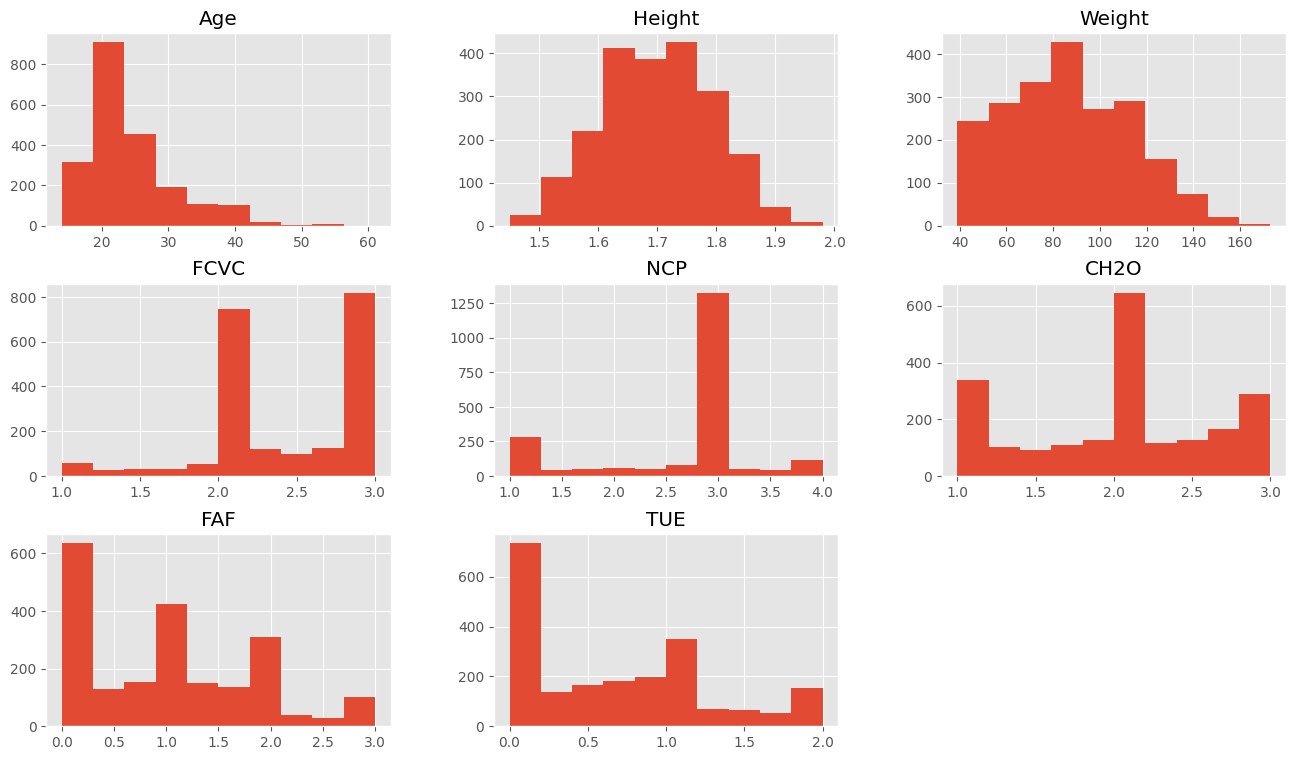

In [8]:
numerico = df.select_dtypes(np.number)
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
numerico.hist()
plt.show()

In [9]:
# Definir los cuartiles (25%, 50%, 75%)
quartiles = df.quantile([0.25, 0.5, 0.75])

# Definir el rango intercuartílico (IQR)
iqr = quartiles.loc[0.75] - quartiles.loc[0.25]

# Calcular los límites inferior y superior para cada columna
iqr_lim_inf = quartiles.loc[0.25] - 1.5 * iqr
iqr_lim_sup = quartiles.loc[0.75] + 1.5 * iqr

# Aplicar el recorte iterativamente a cada columna
for column in numerico.columns:
        numerico[column + '_Capped'] = numerico[column].clip(lower=iqr_lim_inf[column], upper=iqr_lim_sup[column])

<ipython-input-9-a1743ba8f25a>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartiles = df.quantile([0.25, 0.5, 0.75])


Creación de BOX PLOT

In [10]:
for i, column in enumerate(numerico.columns):
  fig = px.box(numerico, y=numerico[column], width = 600, height=400)
  fig.show()

Se usará la prueba de Agostino para comprobar la distribución normal

In [11]:
# se usará la prueba de Agostino
normal=[]
noNormal=[]
for oe in numerico:
  datosColumna = numerico[oe]
  stat,p=normaltest(datosColumna)
  if p > 0.5:
    normal.append(oe)
  else:
    noNormal.append(oe)

print("Con distribucion normal: ",normal)
print("Sin distribucion normal: ",noNormal)

Con distribucion normal:  []
Sin distribucion normal:  ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Age_Capped', 'Height_Capped', 'Weight_Capped', 'FCVC_Capped', 'NCP_Capped', 'CH2O_Capped', 'FAF_Capped', 'TUE_Capped']


Correlación de columnas numéricas

<Axes: title={'center': 'Obesity'}>

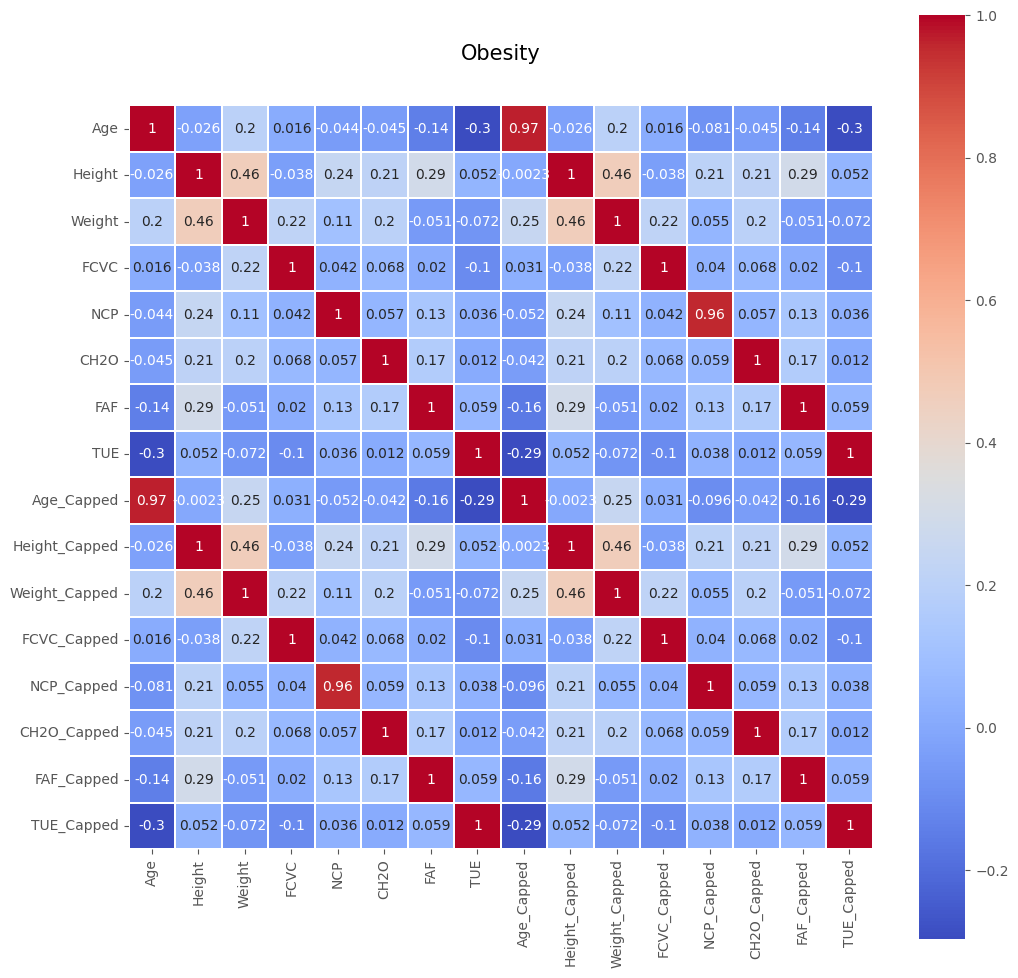

In [12]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(12,12))
plt.title('Obesity', y=1.05, size=15)
sb.heatmap(numerico.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Histogramas de datos categoricos

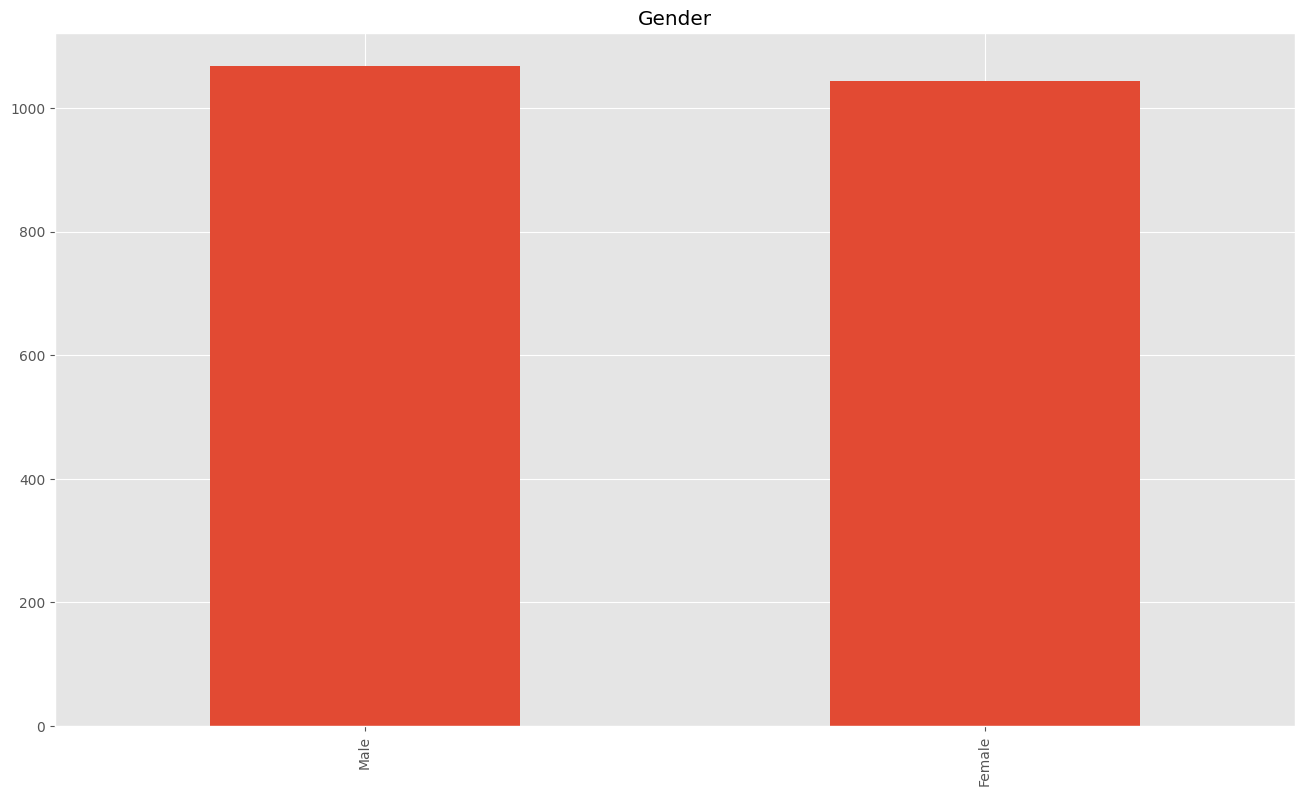

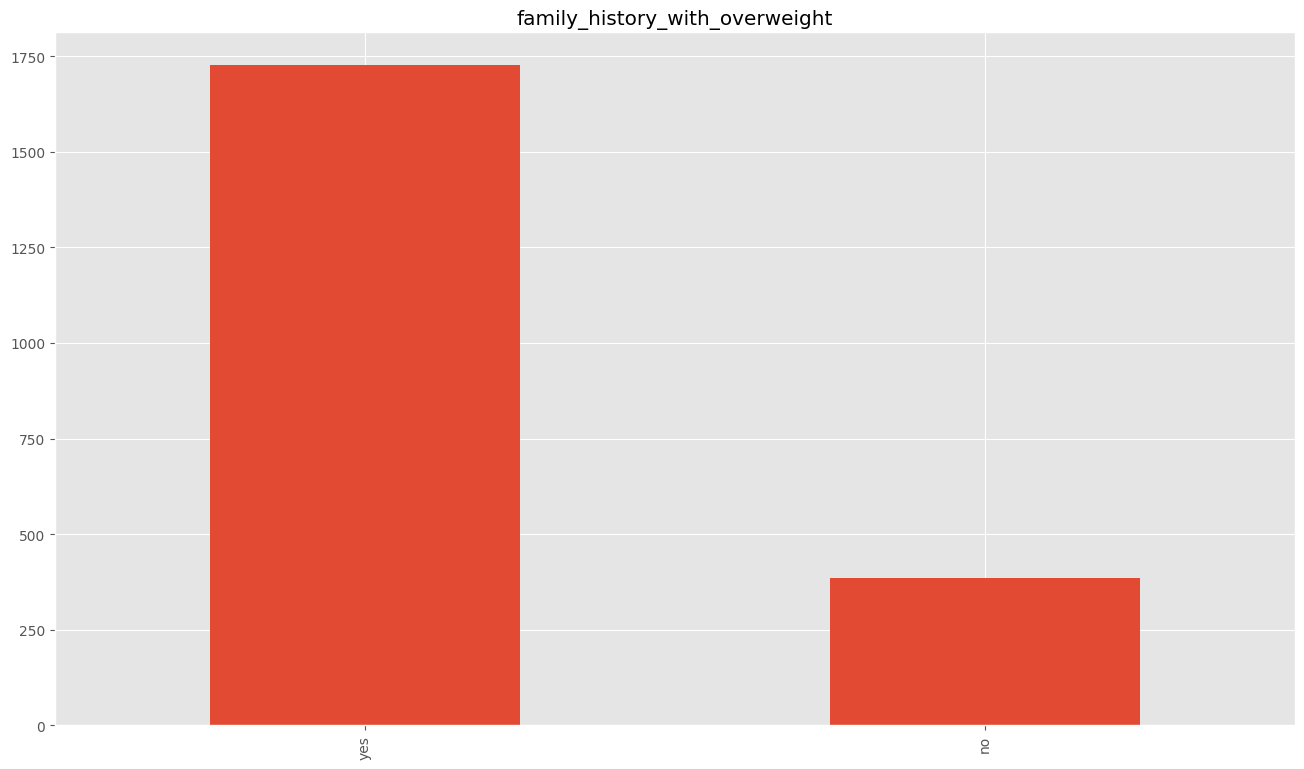

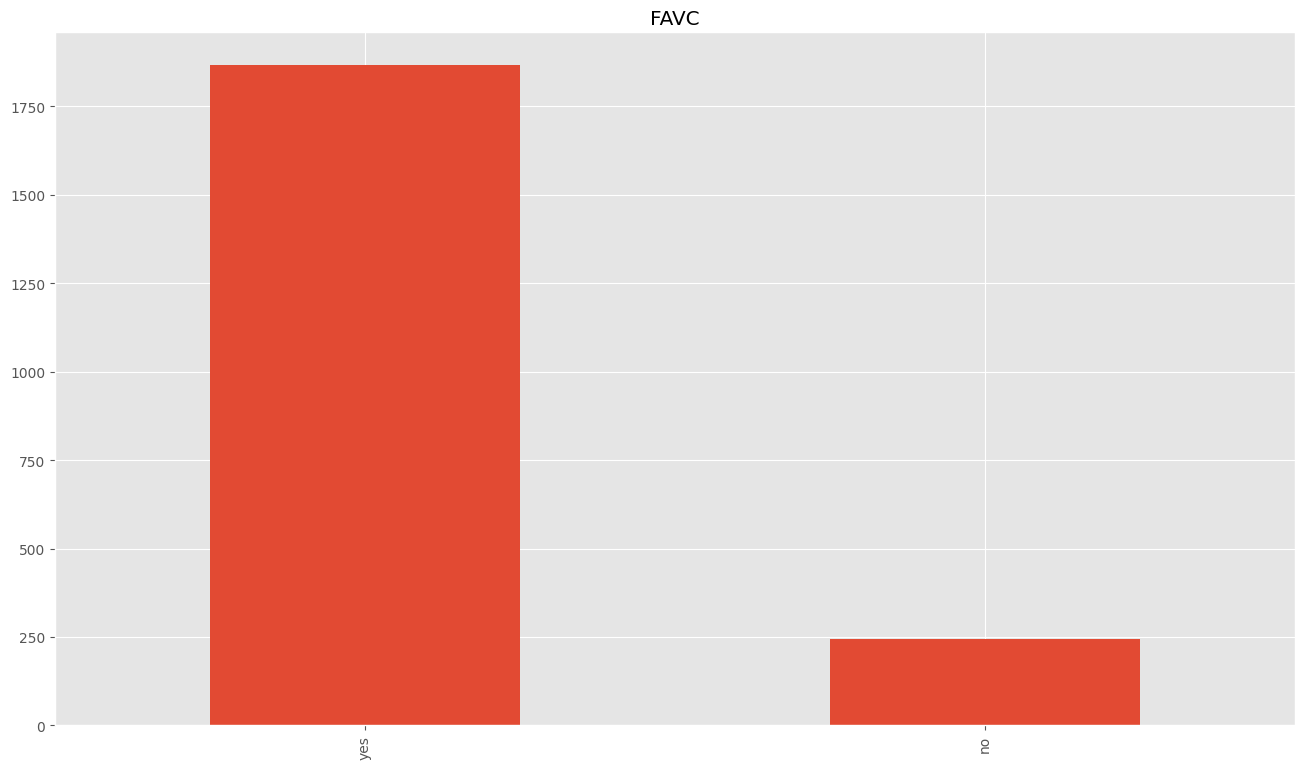

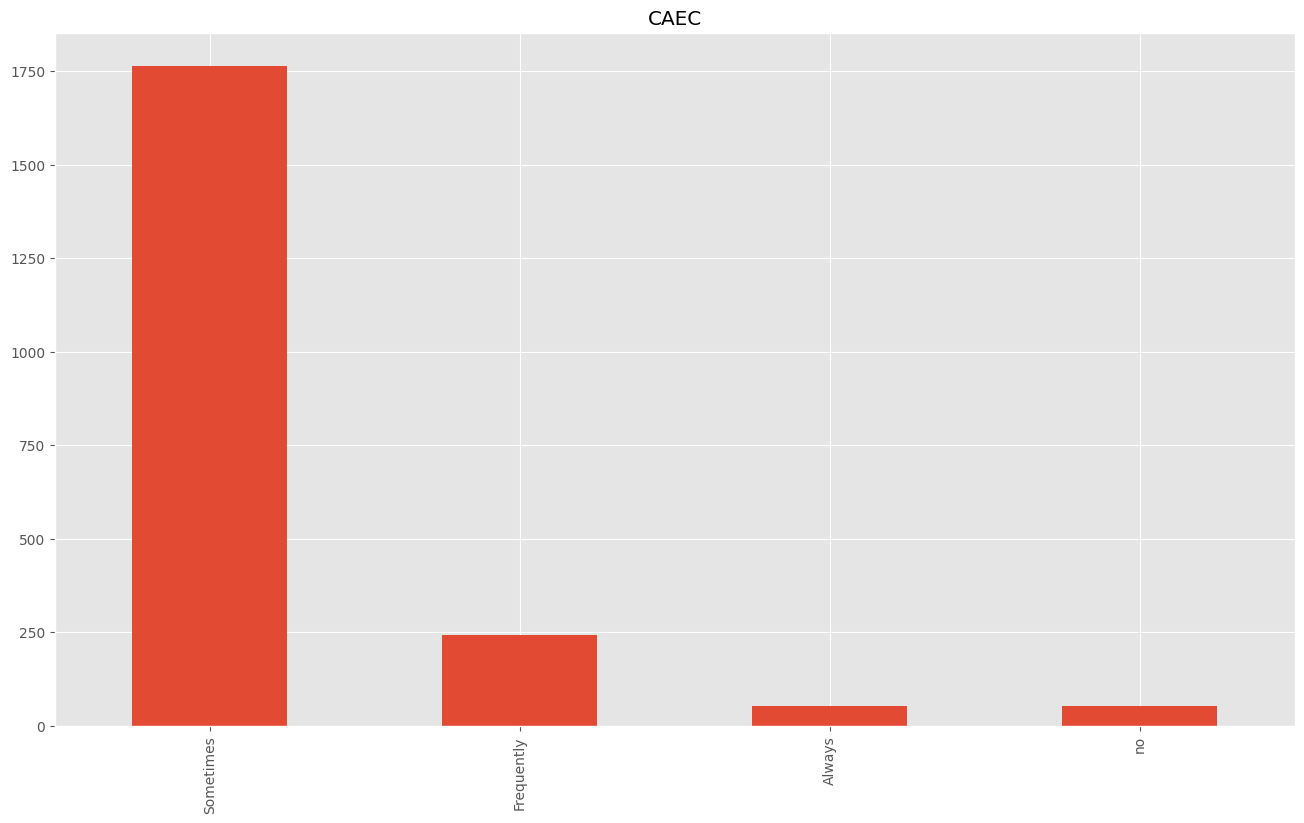

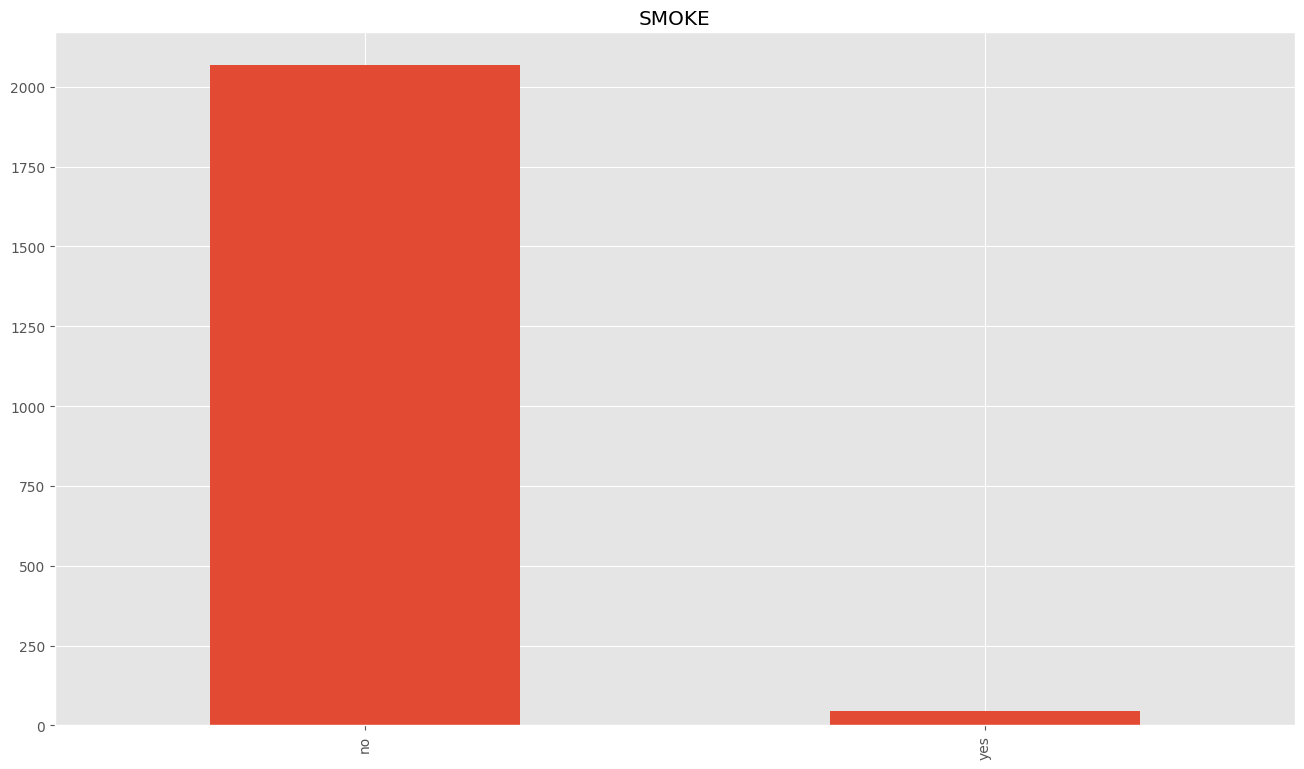

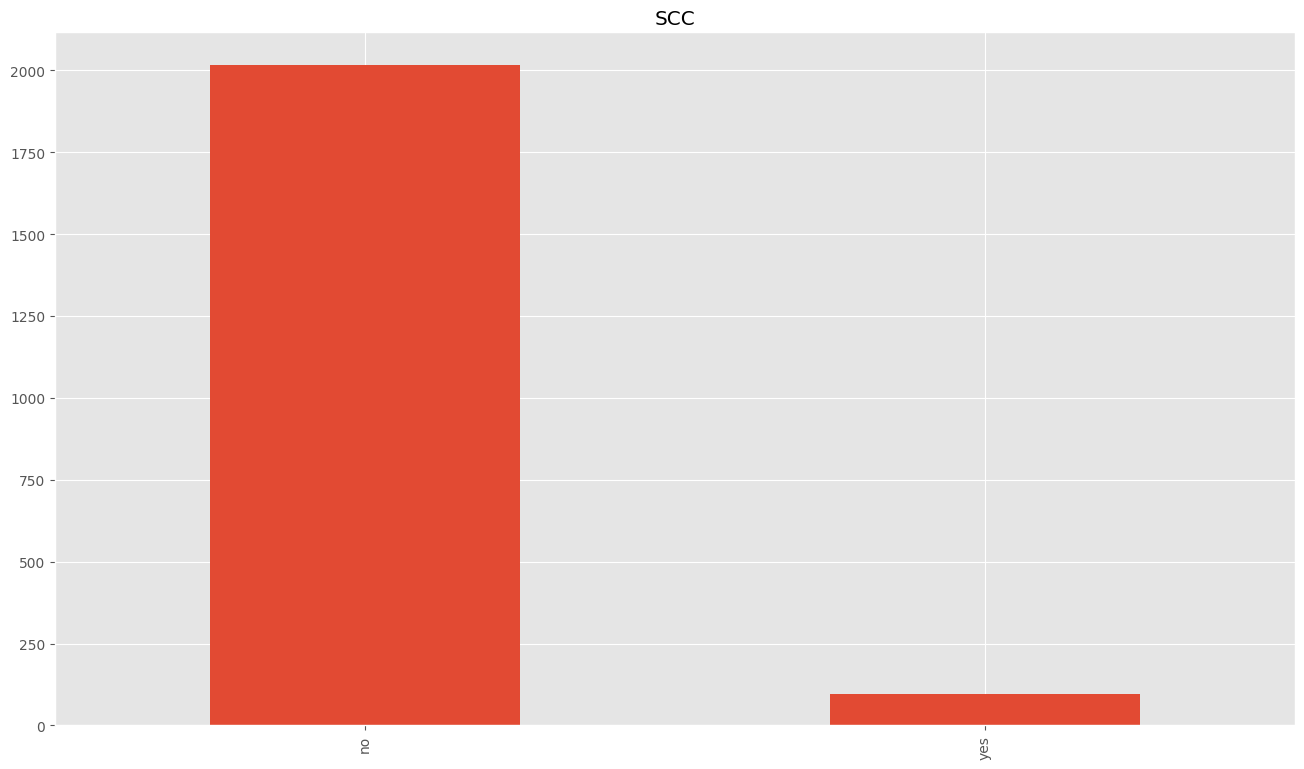

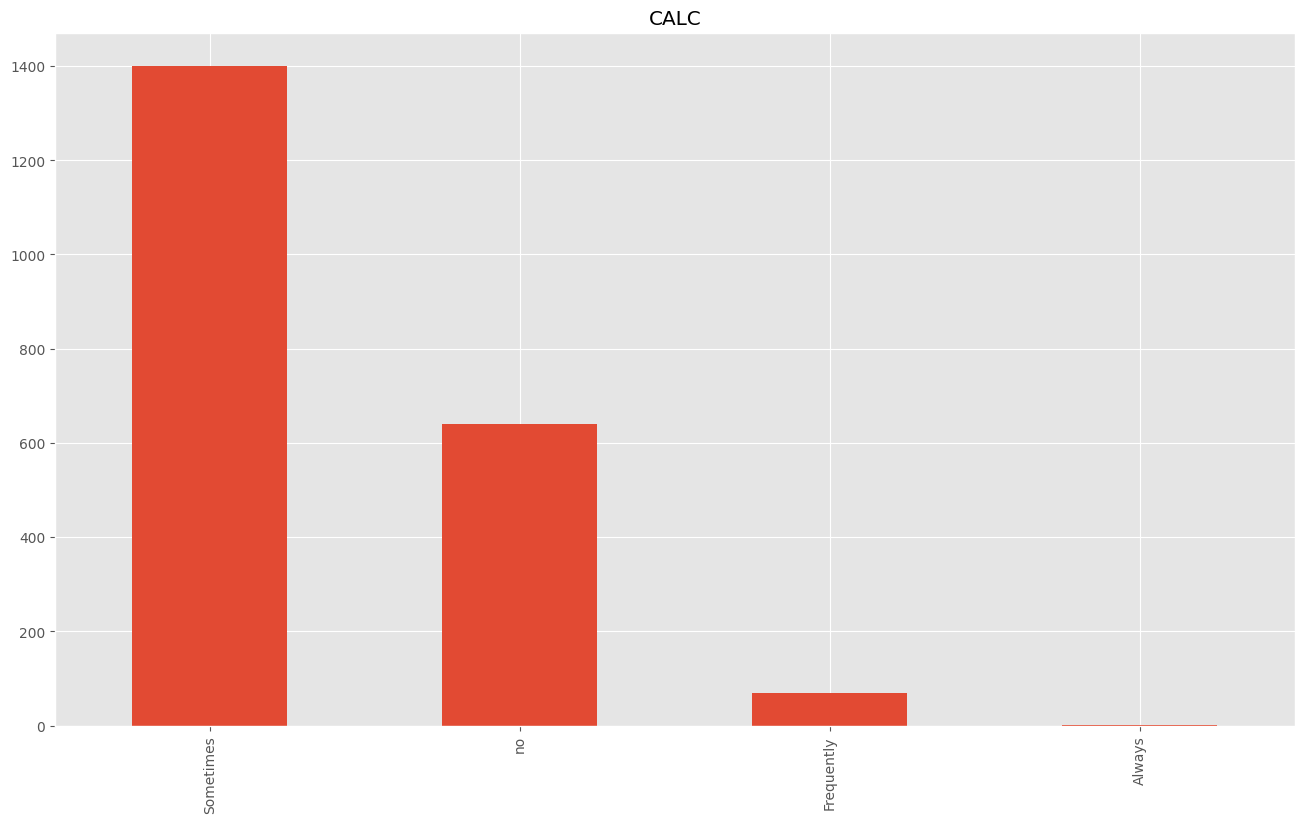

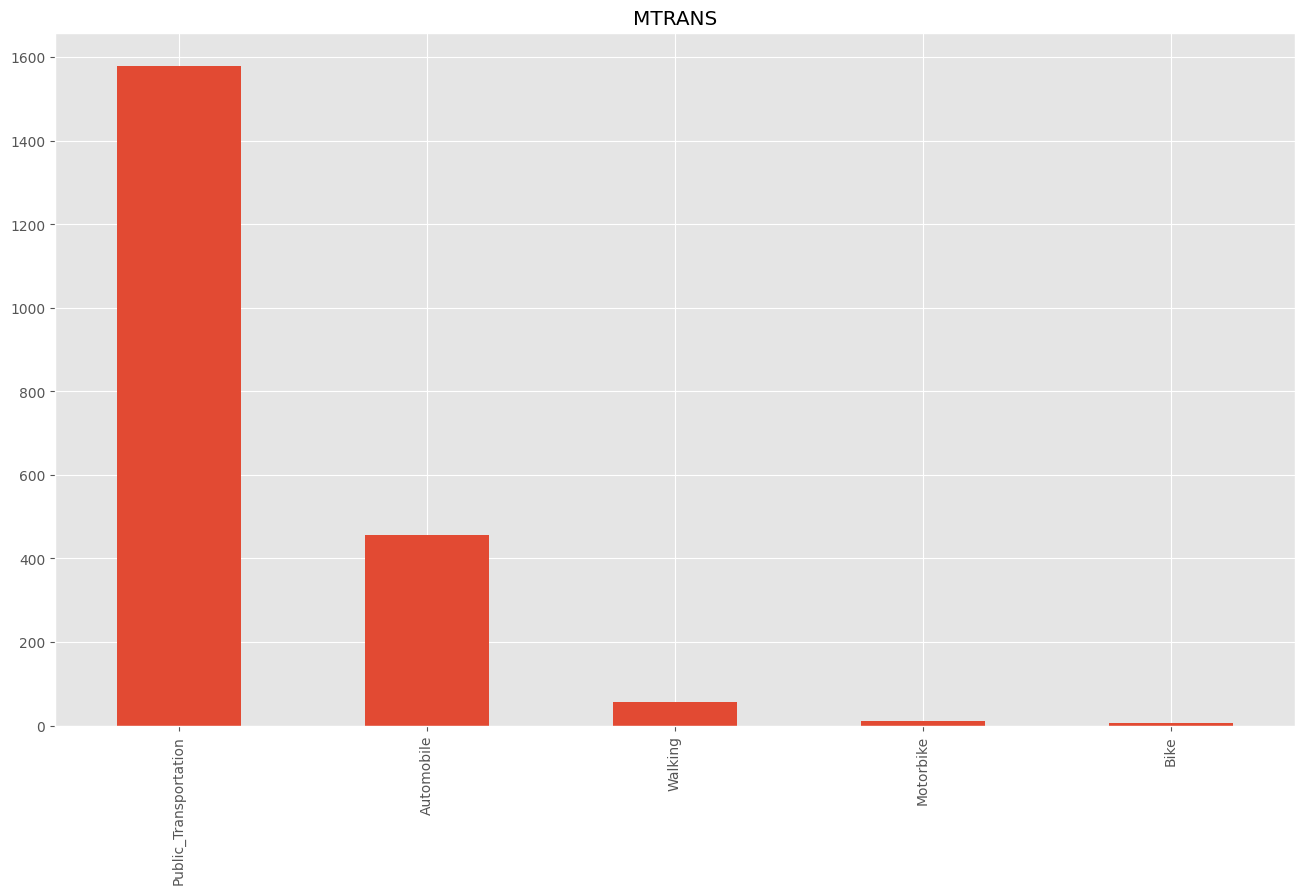

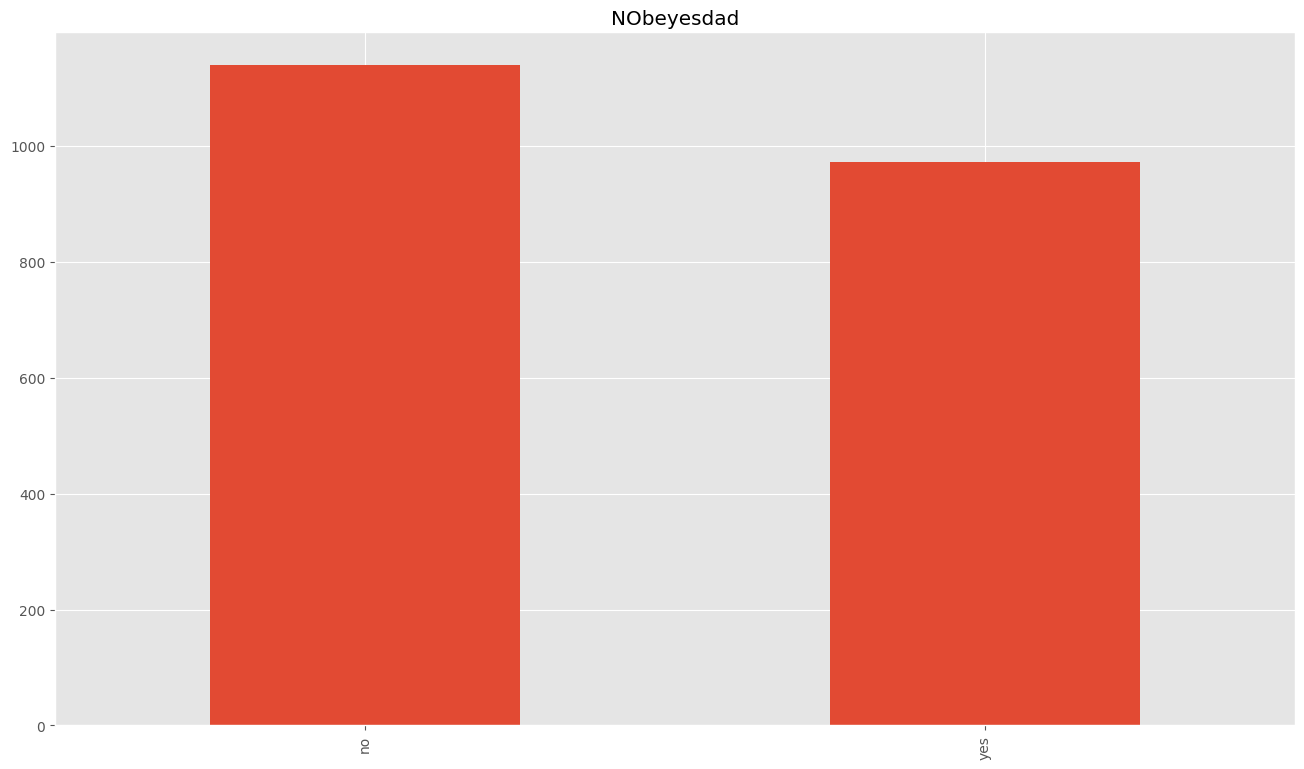

In [13]:
categoricos = [col for col in df.columns if df[col].dtype == 'object' and col!= 'y'] # obteniendo los datos categoricos

# Mostrar los gráficos de barras para cada columna categórica
for col in categoricos:
      fig, ax = plt.subplots()
      df[col].value_counts().plot(kind='bar')
      ax.set_title(col)
      plt.show()

Codificar los valores categoricos para que queden en números, esto con el fin de tratar mejor los datos en el algoritmo

In [14]:
encoder=LabelEncoder()
cat_colsAll = [col for col in df.columns if df[col].dtype == 'object']
# encodificar
for col in cat_colsAll:
        df[col] = encoder.fit_transform(df[col])

Separamos los datos por dos tipos, categórico y numérico

In [15]:
dataNumerica = df.select_dtypes(np.number)
dataCategorica = df.select_dtypes(object)

Normalizar

In [16]:
escalador=StandardScaler()
dataNumerica2=pd.DataFrame(escalador.fit_transform(dataNumerica), columns = dataNumerica.columns)
dataNumerica2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,1.419172,0.503337,-0.923786
1,-1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,-0.521160,0.503337,-0.923786
2,0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,-2.461491,0.503337,-0.923786
3,0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,-2.461491,1.296280,-0.923786
4,0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,-0.521160,0.503337,-0.923786


Modificar datos numéricos

In [17]:
dataNumerica3 = dataNumerica2.round()
dataNumerica3.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.0,-1.0,-1.0,-1.0,0.0,-3.0,-1.0,0.0,0.0,-0.0,-0.0,-0.0,-1.0,1.0,1.0,1.0,-1.0
1,-1.0,-1.0,-2.0,-1.0,0.0,-3.0,1.0,0.0,0.0,7.0,2.0,5.0,2.0,-1.0,-1.0,1.0,-1.0
2,1.0,-0.0,1.0,-0.0,0.0,-3.0,-1.0,0.0,0.0,-0.0,-0.0,-0.0,1.0,1.0,-2.0,1.0,-1.0
3,1.0,0.0,1.0,0.0,-2.0,-3.0,1.0,0.0,0.0,-0.0,-0.0,-0.0,1.0,-1.0,-2.0,1.0,-1.0
4,1.0,-0.0,1.0,0.0,-2.0,-3.0,-1.0,-2.0,0.0,-0.0,-0.0,-0.0,-1.0,-1.0,-1.0,1.0,-1.0


In [18]:
dataNumerica4 = dataNumerica3.astype(int)
dataNumerica2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,1.419172,0.503337,-0.923786
1,-1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,-0.521160,0.503337,-0.923786
2,0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,-2.461491,0.503337,-0.923786
3,0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,-2.461491,1.296280,-0.923786
4,0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,-0.521160,0.503337,-0.923786


Unir los datos numéricos con los categóricos

In [19]:
df = pd.concat([dataNumerica4,dataCategorica], axis = 1) #unir los datos numéricos
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1,-1,-1,-1,0,-3,-1,0,0,0,0,0,-1,1,1,1,-1
1,-1,-1,-2,-1,0,-3,1,0,0,7,2,5,2,-1,-1,1,-1
2,1,0,1,0,0,-3,-1,0,0,0,0,0,1,1,-2,1,-1
3,1,0,1,0,-2,-3,1,0,0,0,0,0,1,-1,-2,1,-1
4,1,0,1,0,-2,-3,-1,-2,0,0,0,0,-1,-1,-1,1,-1


Datos normalizados y modificicados

In [20]:
df.head(15)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1,-1,-1,-1,0,-3,-1,0,0,0,0,0,-1,1,1,1,-1
1,-1,-1,-2,-1,0,-3,1,0,0,7,2,5,2,-1,-1,1,-1
2,1,0,1,0,0,-3,-1,0,0,0,0,0,1,1,-2,1,-1
3,1,0,1,0,-2,-3,1,0,0,0,0,0,1,-1,-2,1,-1
4,1,0,1,0,-2,-3,-1,-2,0,0,0,0,-1,-1,-1,1,-1
5,1,1,-1,-1,-2,0,-1,0,0,0,0,0,-1,-1,-1,-2,-1
6,-1,0,-2,-1,0,0,1,0,0,0,0,0,0,-1,-1,0,-1
7,1,0,-1,-1,-2,-3,-1,0,0,0,0,0,2,-1,-1,1,-1
8,1,0,1,-1,0,0,1,0,0,0,0,0,0,1,-2,1,-1
9,1,0,0,-1,0,0,-1,0,0,0,0,0,0,1,1,1,-1


Asignación de variables para X y Y

In [21]:
X=df.drop(["NObeyesdad"],axis=1) # obtener valores de x
y=df["NObeyesdad"] # valores de y
print(X.shape)
print(X)
print("----")
print(y.shape)
print(y)

(2111, 16)
      Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0         -1   -1      -1      -1                               0    -3    -1   
1         -1   -1      -2      -1                               0    -3     1   
2          1    0       1       0                               0    -3    -1   
3          1    0       1       0                              -2    -3     1   
4          1    0       1       0                              -2    -3    -1   
...      ...  ...     ...     ...                             ...   ...   ...   
2106      -1   -1       0       2                               0     0     1   
2107      -1    0       1       2                               0     0     1   
2108      -1    0       1       2                               0     0     1   
2109      -1    0       0       2                               0     0     1   
2110      -1    0       0       2                               0     0     1   

      NCP  CAEC 

Selección de caracteristicas

#IMPLEMENTACIÓN ALGORITMO ÁRBOLES DE DECISIÓN

In [22]:
caracteristicas=list(df)
print(caracteristicas)

XArbol=df.drop(["CAEC", "TUE", "CALC", "MTRANS", "SCC", "SMOKE", "CAEC", "TUE"],axis=1)
yArbol=df["NObeyesdad"]
caracteristicas=list(XArbol)
print(caracteristicas)
print(XArbol)

['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']
['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CH2O', 'FAF', 'NObeyesdad']
      Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0         -1   -1      -1      -1                               0    -3    -1   
1         -1   -1      -2      -1                               0    -3     1   
2          1    0       1       0                               0    -3    -1   
3          1    0       1       0                              -2    -3     1   
4          1    0       1       0                              -2    -3    -1   
...      ...  ...     ...     ...                             ...   ...   ...   
2106      -1   -1       0       2                               0     0     1   
2107      -1    0       1       2                      

PARTICIÓN DE DATOS 80% 20%

In [23]:
XTrainArbol,XTestArbol,yTrainArbol,yTestArbol=train_test_split(XArbol,yArbol,test_size=0.2,random_state=2)

In [24]:
#curar y normalizar overfiting
escalador=StandardScaler()
dataNumerica2=pd.DataFrame(escalador.fit_transform(dataNumerica), columns = dataNumerica.columns)

Buscar entra un rango de profundidas

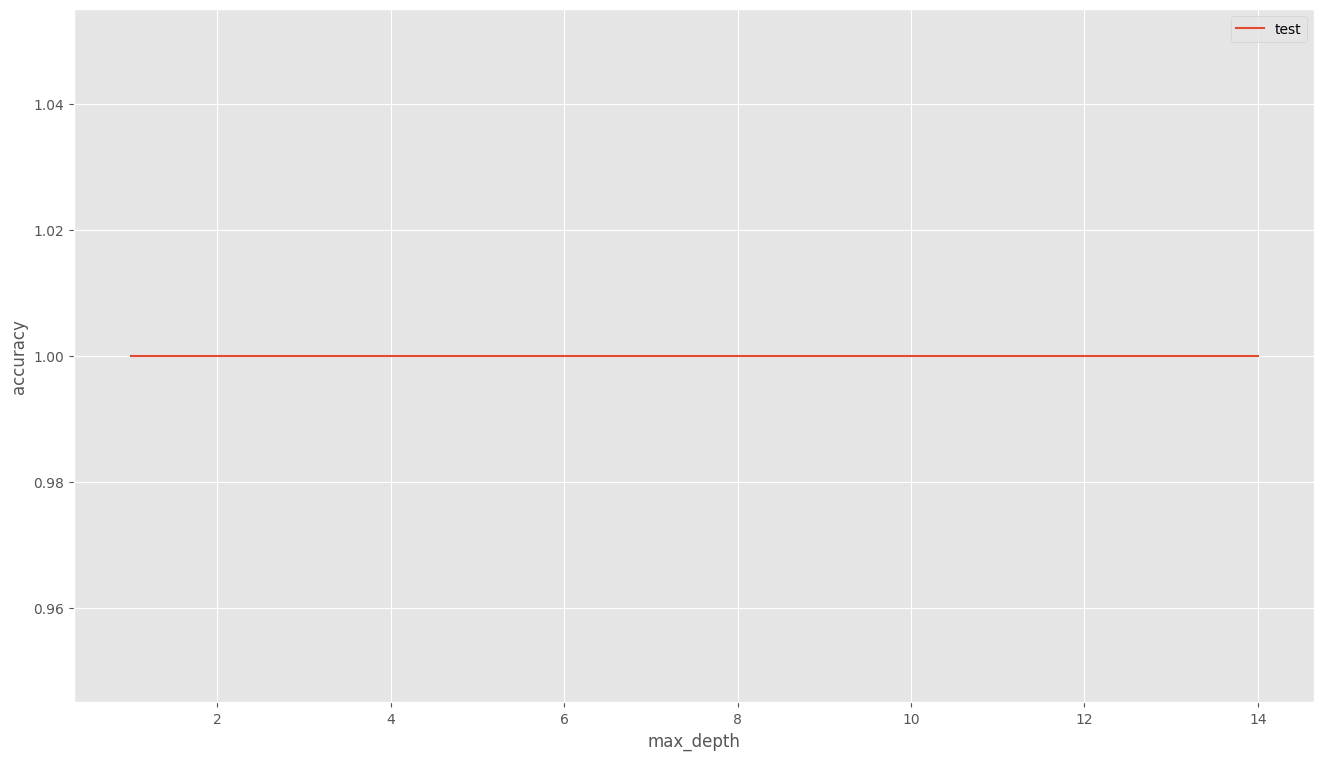

Optimal depth: 1
Accuracy: 1.0


In [25]:
# lista de valores posibles para usar como max_depths
max_depths = list(range(1, 15))

# inicializar las listas para almacenar los resultados
train_scores = []
test_scores = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)

    # calcular la precisión del modelo utilizando la validación cruzada de 5-fold
    test_score = cross_val_score(dt, XTestArbol, yTestArbol, cv=5).mean()

    test_scores.append(test_score)

# graficar los resultados para visualizar la curva de complejidad
plt.plot(max_depths, test_scores, label='test')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# imprimir la profundidad óptima y la precisión asociada
best_depth = max_depths[test_scores.index(max(test_scores))]
best_score = max(test_scores)
print('Optimal depth:', best_depth)
print('Accuracy:', best_score)

In [26]:
modeloArbol=DecisionTreeClassifier(max_depth=2) # DecisionTreeClassifier(max_depth=3) establece la profundidad del árbol en 3
modeloArbol.fit(XTrainArbol,yTrainArbol)
yPredictArbol=modeloArbol.predict(XTrainArbol)
print("Train Accuracy ",metrics.accuracy_score(yTrainArbol,yPredictArbol))

yPredictArbol=modeloArbol.predict(XTestArbol)
print("Test Accuracy ",metrics.accuracy_score(yTestArbol,yPredictArbol))

Train Accuracy  1.0
Test Accuracy  1.0


Identificar overfitting o underfitting usando Vaidación Cruzada

In [27]:
scores = cross_val_score(modeloArbol, X, y, cv=2)

meanScore = np.mean(scores) #Calcular la media de las puntuaciones de precisión
stdScore = np.std(scores) # Calcular la dsviación estandar de las puntuaciones de precision

yPredicTrain = modeloArbol.predict(XTrainArbol) # predicciones en los datos de entrenamiento
yPredTest = modeloArbol.predict(XTestArbol) # predicciones en los datos de prueba

accuracyTrain = accuracy_score(yTrainArbol, yPredicTrain) # precisión en los datos de entrenamiento
accuracy_test = accuracy_score(yTestArbol, yPredTest) # precisión en los datos de prueba

print(f'Precisión en los datos de entrenamiento: {accuracyTrain}')
print(f'Precisión en los datos de prueba: {accuracy_test}')

# puntuaciones de precisión y sus estadísticas
print(f'Puntuaciones de precisión: {scores.mean()}')
print(f'Precisión media: {meanScore}')
print(f'Desviación estándar de la precisión: {stdScore}')

Precisión en los datos de entrenamiento: 1.0
Precisión en los datos de prueba: 1.0
Puntuaciones de precisión: 0.7261785509119633
Precisión media: 0.7261785509119633
Desviación estándar de la precisión: 0.03707902484561254


Matriz de confusión

[[210   0]
 [  0 213]]


<Axes: >

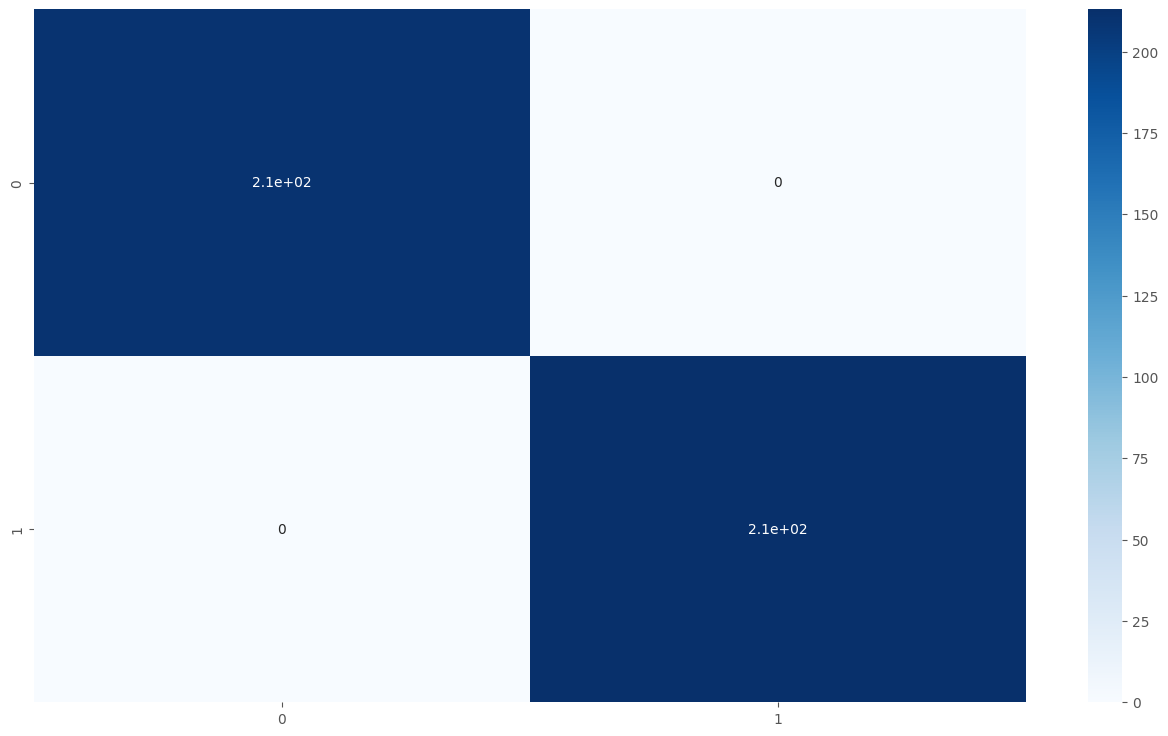

In [28]:
matrizArbol =confusion_matrix(yTestArbol,yPredictArbol)
print(matrizArbol)
sb.heatmap(matrizArbol,annot=True,cmap="Blues")

Significado valores matriz de confusión

In [29]:
vp = matrizArbol[0,0]
fp = matrizArbol[0,1]
fn = matrizArbol[1,0]
vn = matrizArbol[1,1]
# número de clientes de una población estudiada que suscribirán un depósito a plazo que el modelo predice correctamente
print("Verdaderos Positivos = ", vp)
# número de clientes de una población estudiada que suscribirán un deposito a largo plazo que el modelo predijo de manera erronea
print("Falsos Positivos = ", fp)
# número de clientes de una población que no van a suscribir un deposito a plazo que el modelo predijo de manera erronea.
print("Falsos Negativos = ", fn)
# número de clientes de una población que no van a suscribir un deposito a plazo que el modelo predijo de manera correcta.
print("Verdaderos Negativos = ", vn)

Verdaderos Positivos =  210
Falsos Positivos =  0
Falsos Negativos =  0
Verdaderos Negativos =  213


Evaluación capacidad de clasificación correcta del modelo

In [30]:
# Calculamos la sensibilidad y especificidad
sensibilidad = vp / (vp + fn) # O  también conocida como recall
especificidad = vn / (vn + fp) # capacidad del modelo  para detectar correctamente los negativos
print('Sensibilidad:', sensibilidad)
print('Especificidad:', especificidad)

Sensibilidad: 1.0
Especificidad: 1.0


In [31]:
etiquetas = sorted(set(yTestArbol))
print(etiquetas)

[-1, 1]


Métricas

In [36]:
precision_recall_fscore_support(yTestArbol,yPredictArbol,average=None)
etiquetas=["yes","no"]
print(classification_report(yTestArbol,yPredictArbol,target_names=etiquetas))
reportArbol = classification_report(yTestArbol,yPredictArbol,target_names=etiquetas)
accuracyArbol = modeloArbol.score(XTestArbol,yTestArbol)
print("Accuracy=",accuracyArbol)

              precision    recall  f1-score   support

         yes       1.00      1.00      1.00       210
          no       1.00      1.00      1.00       213

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423

Accuracy= 1.0


In [34]:
accuracy = accuracy_score(yTestArbol, yPredictArbol) # proporción de predicciones correctas del modelo
precision = precision_score(yTestArbol, yPredictArbol,average='weighted') # proporción de predicciones positivas que fueron correctas
recall = recall_score(yTestArbol, yPredictArbol, average='weighted') # proporción de positivos reales que se identificaron correctamente
f1 = f1_score(yTestArbol, yPredictArbol,average='weighted' ) # medida armónica de precision y recall
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [37]:
export_graphviz(modeloArbol,out_file="arbol.dot",class_names=etiquetas,feature_names=caracteristicas,impurity=False,filled=True)

Árbol

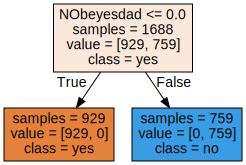

In [38]:
with open("arbol.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

Importancia de las caracteristicas

11


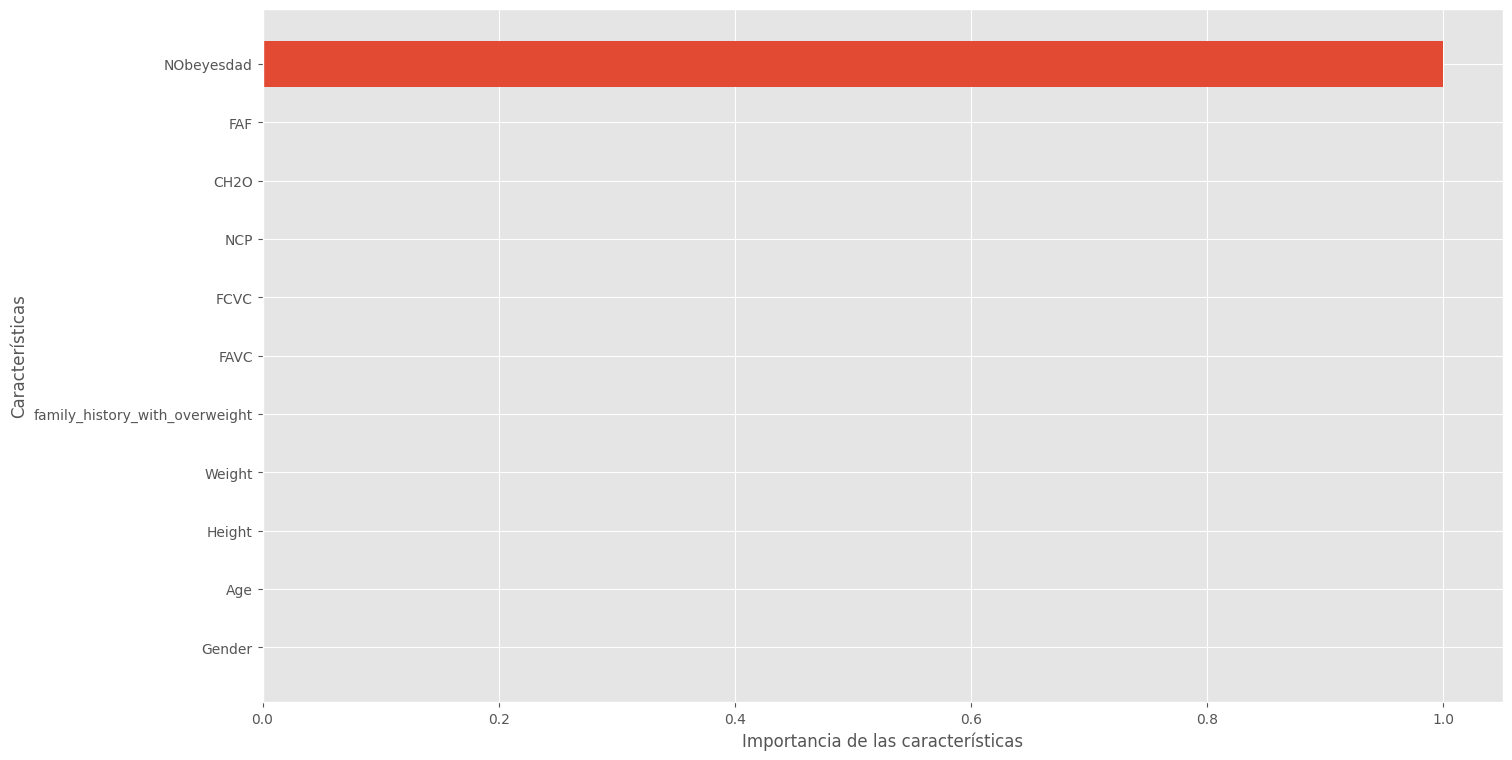

In [39]:
numeroCaracteristicas=XArbol.shape[1]
print(numeroCaracteristicas)
plt.barh(range(numeroCaracteristicas),modeloArbol.feature_importances_)
plt.yticks(np.arange(numeroCaracteristicas),caracteristicas)
plt.xlabel("Importancia de las características")
plt.ylabel("Características")
plt.show()